# Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

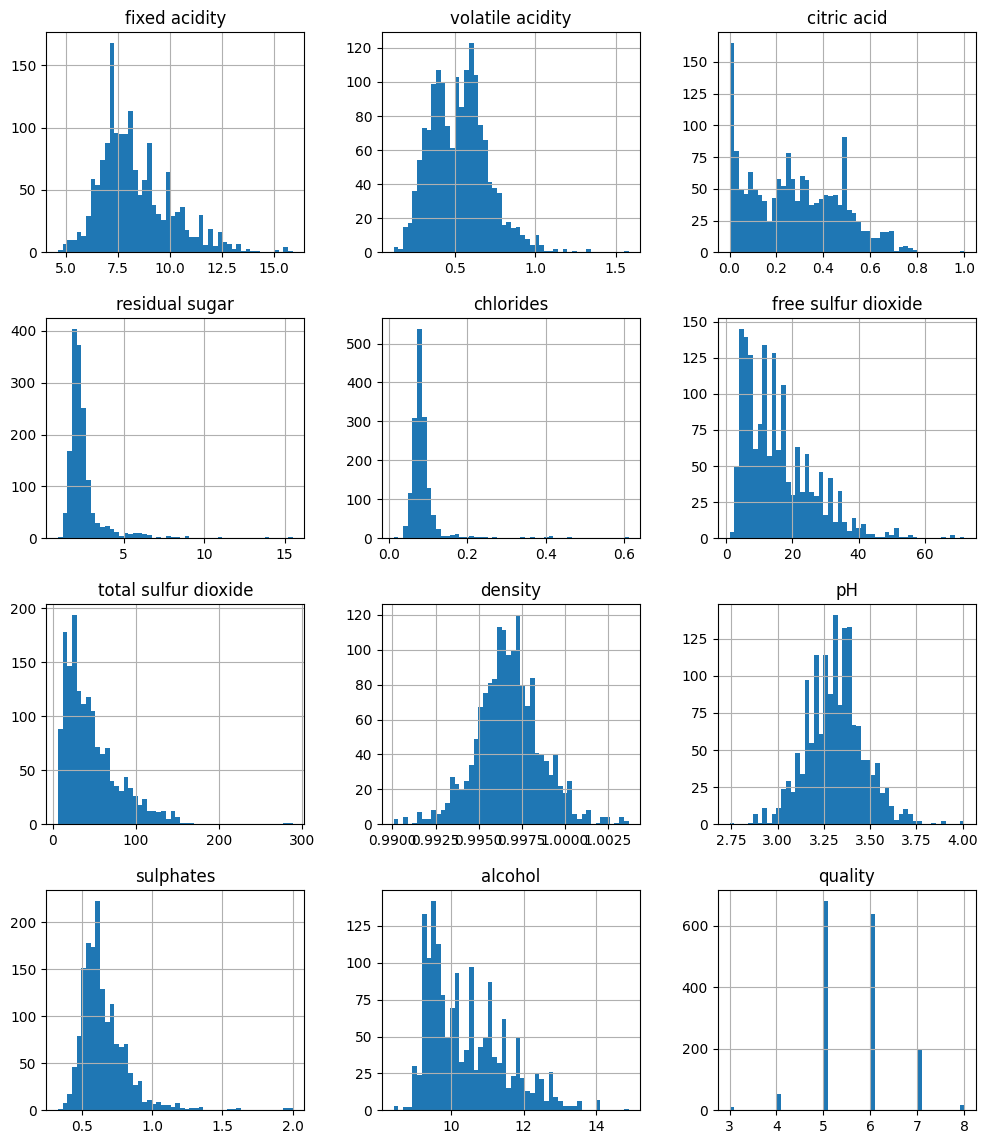

In [6]:
df.hist(bins=50, figsize=(12,14))

<Axes: >

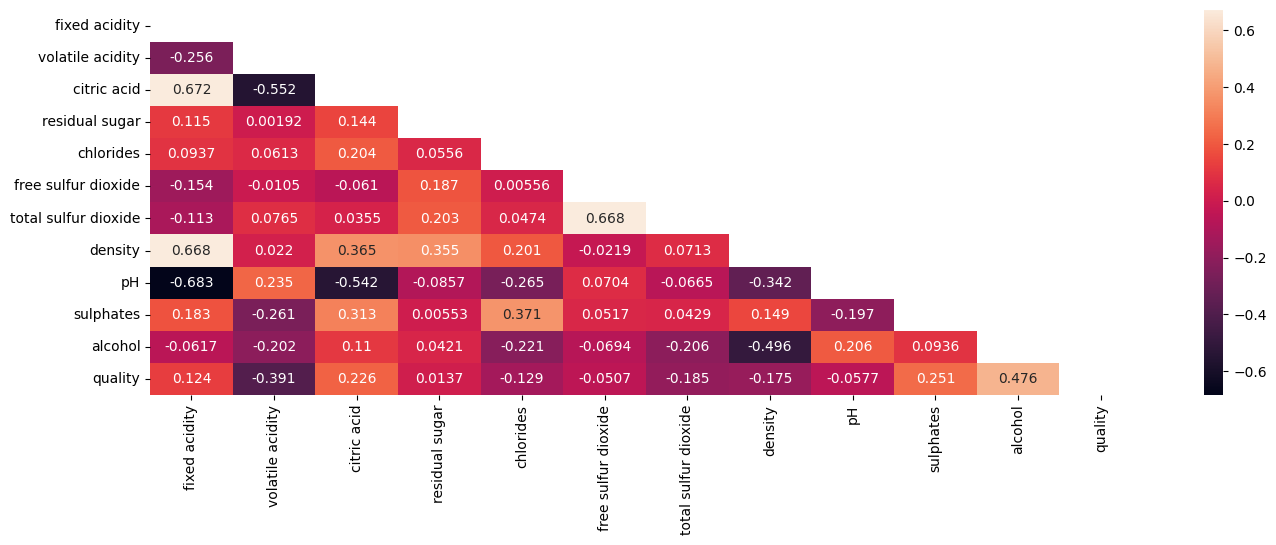

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True, mask=np.triu(corr), fmt='.3')

# Data Quality Report
- No null values, (1599, 12)
- Mostly normalish distributions, skewed right
- Target value of quality is imbalanced
    - 5    681
    - 6    638
    - 7    199
    - 4     53
    - 8     18
    - 3     10 

# Creating a basic MLP

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
train_x, remainder_x, train_y, remainder_y = train_test_split(x, y, test_size=0.3, random_state=42)
train_x.shape

(1119, 11)

In [12]:
valid_x, test_x, valid_y, test_y = train_test_split(remainder_x, remainder_y, test_size=0.5, random_state=42)
print(valid_x.shape)
print(test_x.shape)

(240, 11)
(240, 11)


In [13]:
train_x = torch.tensor(train_x.to_numpy()).float()
train_x

tensor([[ 8.6000,  0.2200,  0.3600,  ...,  3.4700,  0.8700, 11.0000],
        [12.5000,  0.4600,  0.6300,  ...,  2.9900,  0.8700, 10.2000],
        [ 7.2000,  0.5400,  0.2700,  ...,  3.3900,  0.7100, 11.0000],
        ...,
        [ 7.2000,  0.6200,  0.0600,  ...,  3.5100,  0.5400,  9.5000],
        [ 7.9000,  0.2000,  0.3500,  ...,  3.3200,  0.8000, 11.9000],
        [ 5.8000,  0.2900,  0.2600,  ...,  3.3900,  0.5400, 13.5000]])

In [14]:
test_x, valid_x = map(torch.tensor, (test_x.to_numpy(), valid_x.to_numpy()))
test_x = test_x.float()
valid_x = valid_x.float()

train_y, test_y, valid_y = map(torch.tensor, (train_y.to_numpy(), test_y.to_numpy(), valid_y.to_numpy()))

In [15]:
class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [16]:
class BasicWineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(BasicWineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [62]:
def train_model(model, dataset, batch_size, epochs, lr=0.0001, momentum=0.7, optimizer=None):
    train_loader = DataLoader(dataset=dataset, batch_size=batch_size)
    criterion = torch.nn.MSELoss()

    if not optimizer:
        optimizer = torch.optim.SGD(params=model.parameters(), lr=lr, momentum=momentum)

    loss_valid = []
    loss_train = []
    
    for epoch in range(epochs):
        model.train()
        
        # Batch the data
        epoch_loss_train = []
        for features, targets in train_loader:
            output = model.forward(features) # Get model hypotheses
    
            # Calculate a loss
            loss = criterion(output.float(), targets.float())
            epoch_loss_train.append(loss.item())
            optimizer.zero_grad() # remove any previous losses
            loss.backward() # Calculate the current losses backward through the MLP
            optimizer.step() # Apply to the model itself
            
        # Calculate the training loss per epoch
        loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
        
        # Per epoch, get validation performance
        model.eval() # Puts the model in evaluation mode
        valid_hyp = model.forward(valid_x)
        loss_valid.append(criterion(valid_hyp, valid_y).item())
    
        print(f'Epoch: {epoch}, Train Loss: {loss_train[-1]}, Valid Loss: {loss_valid[-1]}')

    test_hyp = model.forward(test_x)
    test_loss = criterion(test_hyp, test_y)

    print(f'{"":=^60}')
    print(f'The test loss is {test_loss.item()}')

In [47]:
wine_train = WineDataset(train_x, train_y)

In [63]:
basic_model = BasicWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(basic_model, dataset=wine_train, batch_size=8, epochs=100)

Epoch: 0, Train Loss: 5.342517724846091, Valid Loss: 1.1498502492904663
Epoch: 1, Train Loss: 0.9594413955296789, Valid Loss: 0.8636866807937622
Epoch: 2, Train Loss: 0.8808817901781627, Valid Loss: 0.8535448312759399
Epoch: 3, Train Loss: 0.8716938855392592, Valid Loss: 0.8436755537986755
Epoch: 4, Train Loss: 0.8650837433125291, Valid Loss: 0.8354097008705139
Epoch: 5, Train Loss: 0.8595299968762057, Valid Loss: 0.8283829689025879
Epoch: 6, Train Loss: 0.8547135845891067, Valid Loss: 0.8224872946739197
Epoch: 7, Train Loss: 0.8503530711999961, Valid Loss: 0.8172681927680969
Epoch: 8, Train Loss: 0.8465604386159352, Valid Loss: 0.8127296566963196
Epoch: 9, Train Loss: 0.8431311683995383, Valid Loss: 0.8087292313575745
Epoch: 10, Train Loss: 0.8400731710450989, Valid Loss: 0.8051615953445435
Epoch: 11, Train Loss: 0.8373057481433664, Valid Loss: 0.8019447922706604
Epoch: 12, Train Loss: 0.8347948485187122, Valid Loss: 0.7990148067474365
Epoch: 13, Train Loss: 0.8324438885918686, Valid 

In [68]:
basic_model = BasicWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(basic_model, dataset=wine_train, batch_size=8, epochs=500)

Epoch: 0, Train Loss: 11.495884794848306, Valid Loss: 4.281857490539551
Epoch: 1, Train Loss: 1.9113207376429013, Valid Loss: 0.9264988899230957
Epoch: 2, Train Loss: 0.9108761425529207, Valid Loss: 0.8271573781967163
Epoch: 3, Train Loss: 0.8740504622459412, Valid Loss: 0.8127308487892151
Epoch: 4, Train Loss: 0.8626692520720618, Valid Loss: 0.8043500185012817
Epoch: 5, Train Loss: 0.8536855514560427, Valid Loss: 0.7973575592041016
Epoch: 6, Train Loss: 0.8458502894001347, Valid Loss: 0.7912997603416443
Epoch: 7, Train Loss: 0.8389579928347043, Valid Loss: 0.7860063314437866
Epoch: 8, Train Loss: 0.8328675514885358, Valid Loss: 0.7813562154769897
Epoch: 9, Train Loss: 0.827462562918663, Valid Loss: 0.7772526741027832
Epoch: 10, Train Loss: 0.8226461471191474, Valid Loss: 0.7736169695854187
Epoch: 11, Train Loss: 0.8183370476322515, Valid Loss: 0.7703828811645508
Epoch: 12, Train Loss: 0.81446726460542, Valid Loss: 0.7674943208694458
Epoch: 13, Train Loss: 0.8109789941992078, Valid Los

# Making changes to basic MLP

In [42]:
class FinalWineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(FinalWineMLP, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.hidden)
        self.linear3 = torch.nn.Linear(self.hidden, self.outputs)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out

# Adding another hidden layer
- The changed model adds another hidden layer. I added it to see if the loss would decrease further with the same parameters
- It ended up being roughly the same if not slightly worse for 100 and 500 epochs, maybe it's because the data is not too large or complex to benefit

In [70]:
final_model = FinalWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(final_model, dataset=wine_train, batch_size=8, epochs=100)

Epoch: 0, Train Loss: 6.440800252982548, Valid Loss: 2.264320135116577
Epoch: 1, Train Loss: 1.208832386136055, Valid Loss: 0.8922539353370667
Epoch: 2, Train Loss: 0.9338918023875782, Valid Loss: 0.870732307434082
Epoch: 3, Train Loss: 0.9198624585356031, Valid Loss: 0.8599227666854858
Epoch: 4, Train Loss: 0.9087031681622778, Valid Loss: 0.8505693078041077
Epoch: 5, Train Loss: 0.8985678466303008, Valid Loss: 0.8420453071594238
Epoch: 6, Train Loss: 0.8893653269324984, Valid Loss: 0.8341708779335022
Epoch: 7, Train Loss: 0.8809680087225777, Valid Loss: 0.8271681070327759
Epoch: 8, Train Loss: 0.8732829868793488, Valid Loss: 0.8207219839096069
Epoch: 9, Train Loss: 0.8661700722362314, Valid Loss: 0.8148223757743835
Epoch: 10, Train Loss: 0.8596197519983564, Valid Loss: 0.8094463348388672
Epoch: 11, Train Loss: 0.8536203137465885, Valid Loss: 0.8045344352722168
Epoch: 12, Train Loss: 0.8481487713754177, Valid Loss: 0.8002076745033264
Epoch: 13, Train Loss: 0.8431794637015888, Valid Los

In [69]:
final_model = FinalWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(final_model, dataset=wine_train, batch_size=8, epochs=500)

Epoch: 0, Train Loss: 3.13159209468535, Valid Loss: 0.9570530652999878
Epoch: 1, Train Loss: 0.9697292938828468, Valid Loss: 0.920989990234375
Epoch: 2, Train Loss: 0.9319336737905229, Valid Loss: 0.9088889956474304
Epoch: 3, Train Loss: 0.9190545390759196, Valid Loss: 0.8923958539962769
Epoch: 4, Train Loss: 0.9064483793718474, Valid Loss: 0.8850313425064087
Epoch: 5, Train Loss: 0.8983880051544735, Valid Loss: 0.8761604428291321
Epoch: 6, Train Loss: 0.89001554697752, Valid Loss: 0.8694438934326172
Epoch: 7, Train Loss: 0.882839292713574, Valid Loss: 0.8625261187553406
Epoch: 8, Train Loss: 0.8766942722456795, Valid Loss: 0.8569391369819641
Epoch: 9, Train Loss: 0.8711773561579841, Valid Loss: 0.8505298495292664
Epoch: 10, Train Loss: 0.8662383064627648, Valid Loss: 0.8448676466941833
Epoch: 11, Train Loss: 0.8607761111642633, Valid Loss: 0.8409864902496338
Epoch: 12, Train Loss: 0.8574365781886237, Valid Loss: 0.8357030153274536
Epoch: 13, Train Loss: 0.8539788919900145, Valid Loss:

# Using Adam instead of SGD w/ Momentum
- Adam extends SGD with a dynamic learning rate, so I chose it for a direct comparison and had a ~4% decrease in loss
- I think this happened because it may have learned quicker than SGD within 100 epochs

In [66]:
final_model = FinalWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(final_model, dataset=wine_train, batch_size=8, epochs=100, optimizer=torch.optim.Adam(final_model.parameters(), lr=0.0001))

Epoch: 0, Train Loss: 42.092820344652445, Valid Loss: 37.20762252807617
Epoch: 1, Train Loss: 32.88347924096244, Valid Loss: 29.821666717529297
Epoch: 2, Train Loss: 26.26606810433524, Valid Loss: 23.69024658203125
Epoch: 3, Train Loss: 20.275463669640676, Valid Loss: 18.031354904174805
Epoch: 4, Train Loss: 15.310911587306432, Valid Loss: 13.803309440612793
Epoch: 5, Train Loss: 12.121316896166121, Valid Loss: 11.389273643493652
Epoch: 6, Train Loss: 10.470888366018023, Valid Loss: 10.14630126953125
Epoch: 7, Train Loss: 9.580166561262947, Valid Loss: 9.384804725646973
Epoch: 8, Train Loss: 8.9293555191585, Valid Loss: 8.764561653137207
Epoch: 9, Train Loss: 8.337546144212995, Valid Loss: 8.186386108398438
Epoch: 10, Train Loss: 7.784332016536168, Valid Loss: 7.647893905639648
Epoch: 11, Train Loss: 7.265799670560019, Valid Loss: 7.1407670974731445
Epoch: 12, Train Loss: 6.775309218679156, Valid Loss: 6.652446269989014
Epoch: 13, Train Loss: 6.298386838606426, Valid Loss: 6.1773538589

# Adjusting the LR
- I increased the learning rate from 0.0001 to 0.001 and had a test loss of ~.67, a ~13% decrease from the original
- The higher learning rate helped the model move closer to the optimal weight quicker, and it didn't overfit in the 100 epochs

In [67]:
final_model = FinalWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(final_model, dataset=wine_train, batch_size=8, epochs=100, optimizer=torch.optim.Adam(final_model.parameters(), lr=0.001))

Epoch: 0, Train Loss: 32.16793434960501, Valid Loss: 31.863101959228516
Epoch: 1, Train Loss: 30.631906495775496, Valid Loss: 30.343015670776367
Epoch: 2, Train Loss: 29.152894183567593, Valid Loss: 28.878341674804688
Epoch: 3, Train Loss: 27.72802151271275, Valid Loss: 27.466968536376953
Epoch: 4, Train Loss: 26.355362047467914, Valid Loss: 26.107072830200195
Epoch: 5, Train Loss: 25.033162798200333, Valid Loss: 24.79693603515625
Epoch: 6, Train Loss: 23.75979268210275, Valid Loss: 23.534982681274414
Epoch: 7, Train Loss: 22.533708231789724, Valid Loss: 22.3197078704834
Epoch: 8, Train Loss: 21.353462280545916, Valid Loss: 21.149700164794922
Epoch: 9, Train Loss: 20.217689595903668, Valid Loss: 20.02362823486328
Epoch: 10, Train Loss: 19.12509333065578, Valid Loss: 18.94023895263672
Epoch: 11, Train Loss: 18.074461596352712, Valid Loss: 17.89833641052246
Epoch: 12, Train Loss: 17.064639105115617, Valid Loss: 16.896814346313477
Epoch: 13, Train Loss: 16.094538027899606, Valid Loss: 15.

# Adjusting the epochs
- I increased the epochs from 100 to 500 and saw a slight decrease in performance compared to the 100 epochs on similar parameters of the changed model
- The higher learning rate with more epochs may have led to slight overfitting and thus a decrease on the test performance

In [71]:
final_model = FinalWineMLP(n_inputs=train_x.shape[1], hidden_size=5, n_outputs=1)
train_model(final_model, dataset=wine_train, batch_size=8, epochs=500, optimizer=torch.optim.Adam(final_model.parameters(), lr=0.001))

Epoch: 0, Train Loss: 13.625261320386613, Valid Loss: 7.358748912811279
Epoch: 1, Train Loss: 6.298410132953099, Valid Loss: 5.234786033630371
Epoch: 2, Train Loss: 4.0629119098186495, Valid Loss: 2.830477476119995
Epoch: 3, Train Loss: 1.8636270565646036, Valid Loss: 1.128999948501587
Epoch: 4, Train Loss: 0.9263999721833638, Valid Loss: 0.8148605227470398
Epoch: 5, Train Loss: 0.8182505000914846, Valid Loss: 0.7770906686782837
Epoch: 6, Train Loss: 0.7982053011655807, Valid Loss: 0.7542734742164612
Epoch: 7, Train Loss: 0.7829088051404272, Valid Loss: 0.7375260591506958
Epoch: 8, Train Loss: 0.7690895797950881, Valid Loss: 0.7219511866569519
Epoch: 9, Train Loss: 0.7564671896398067, Valid Loss: 0.7102651596069336
Epoch: 10, Train Loss: 0.7457854741386005, Valid Loss: 0.7006465792655945
Epoch: 11, Train Loss: 0.7368030792900494, Valid Loss: 0.6923422813415527
Epoch: 12, Train Loss: 0.7290384114852974, Valid Loss: 0.6851771473884583
Epoch: 13, Train Loss: 0.7223356274621827, Valid Loss